In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Data.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df = df[['status', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age','extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'movement','card_present_flag','merchant_id','merchant_suburb', 
       'merchant_state','merchant_long_lat']]

In [6]:
df.head()

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_code,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat
0,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,NaN,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99
1,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,NaN,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87
2,authorized,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,NaN,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87
3,authorized,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,NaN,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68
4,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,NaN,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06


In [7]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [8]:
df.merchant_suburb.value_counts()

Melbourne          255
Sydney             233
Southport           82
Brisbane City       79
Chatswood           55
                  ... 
Dutton Park          1
Waikiki              1
Dandenong North      1
Cairns North         1
Birkenhead           1
Name: merchant_suburb, Length: 1609, dtype: int64

In [9]:
df.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

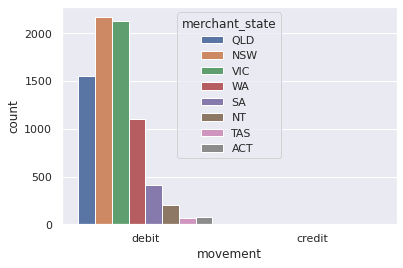

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="movement",hue = 'merchant_state', data=df)

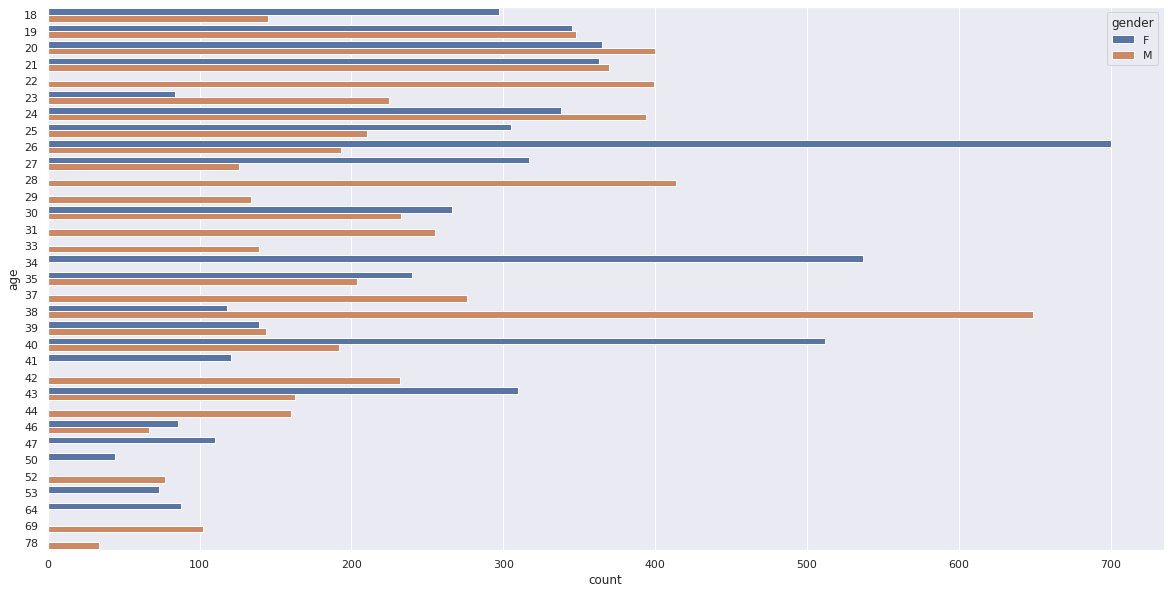

In [11]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid",)
ax = sns.countplot(y="age",hue = 'gender' ,data=df)

In [12]:
table = pd.pivot_table(data=df,index=['merchant_state'], columns = df['gender'], aggfunc = 'sum')
table

age           amount  ... card_present_flag merchant_code     
gender              F      M         F  ...                 M             F    M
merchant_state                          ...                                     
ACT              1433    794   1657.44  ...              25.0           0.0  0.0
NSW             28423  36303  41430.88  ...             928.0           0.0  0.0
NT               5346    209   8741.42  ...               4.0           0.0  0.0
QLD             24248  22298  28611.05  ...             621.0           0.0  0.0
SA               7598   5222  11349.73  ...             129.0           0.0  0.0
TAS               954   1372    622.72  ...              45.0           0.0  0.0
VIC             31013  37271  38626.01  ...             992.0           0.0  0.0
WA              17323  12105  19908.15  ...             348.0           0.0  0.0

[8 rows x 10 columns]

In [13]:
df['Count'] = 1

In [14]:
transactions = df[['age','gender','merchant_state','Count','txn_description','movement']]

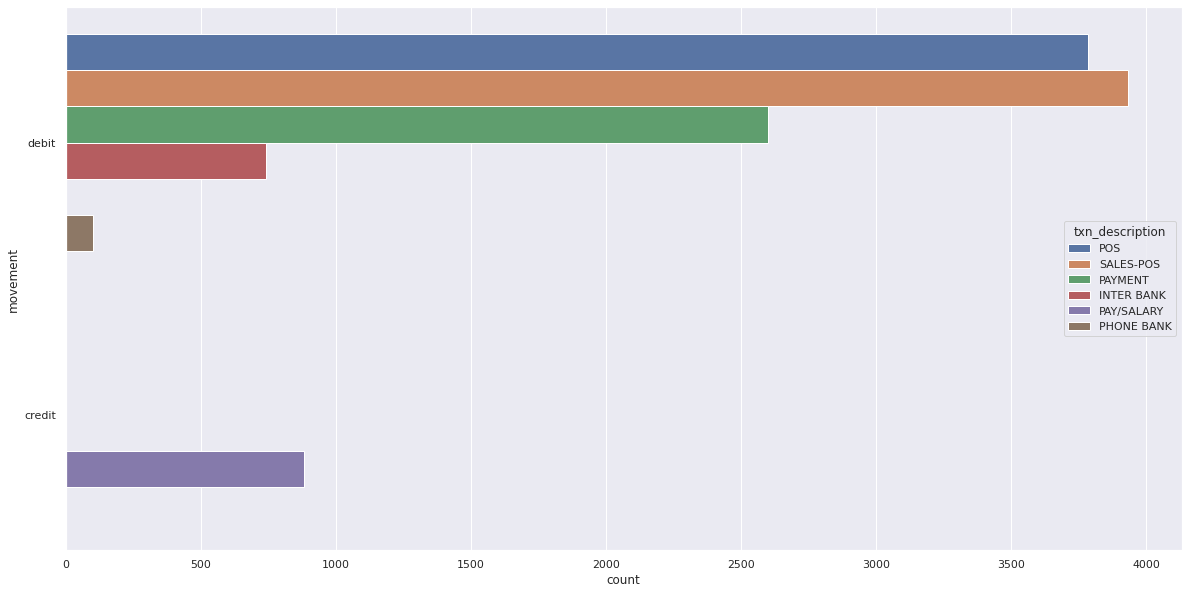

In [15]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid",)
ax = sns.countplot(y="movement",hue = 'txn_description' ,data=transactions)

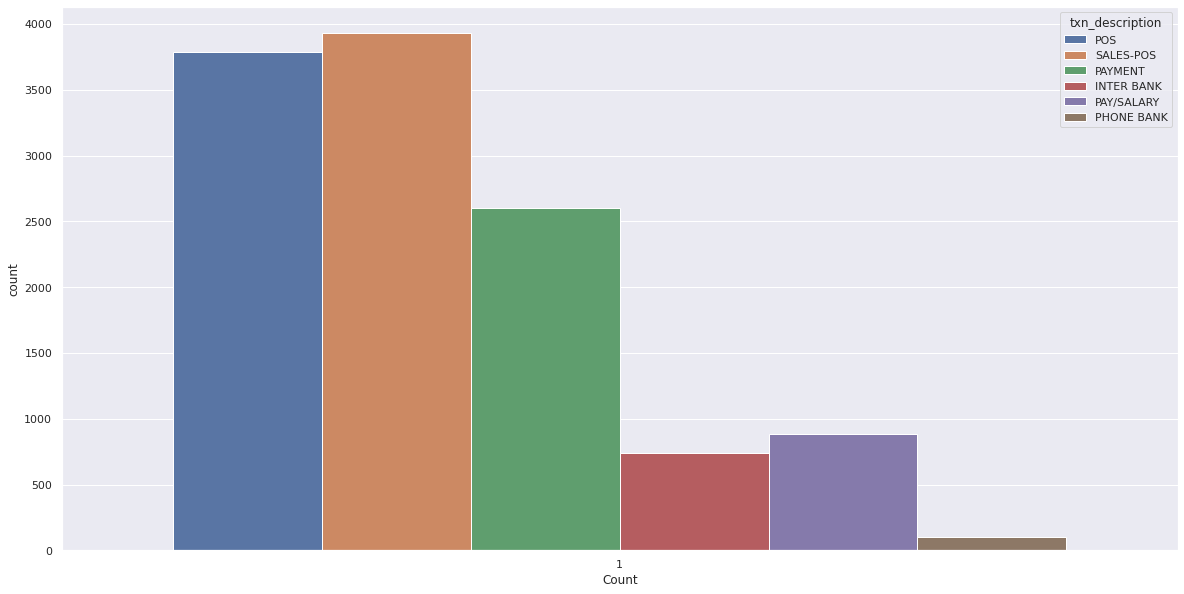

In [16]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid",)
ax = sns.countplot(x="Count",hue = 'txn_description' ,data=transactions)

In [17]:
df.isnull().sum()

status                   0
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
movement                 0
card_present_flag     4326
merchant_id           4326
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
Count                    0
dtype: int64

In [18]:
df.drop(['bpay_biller_code','merchant_code'], axis = 1, inplace = True)

In [19]:
df.account.nunique()

100

In [20]:
datecount = df.groupby("date").count()

In [21]:
transactionvol = datecount["Count"].mean()
n = len(datecount.index)

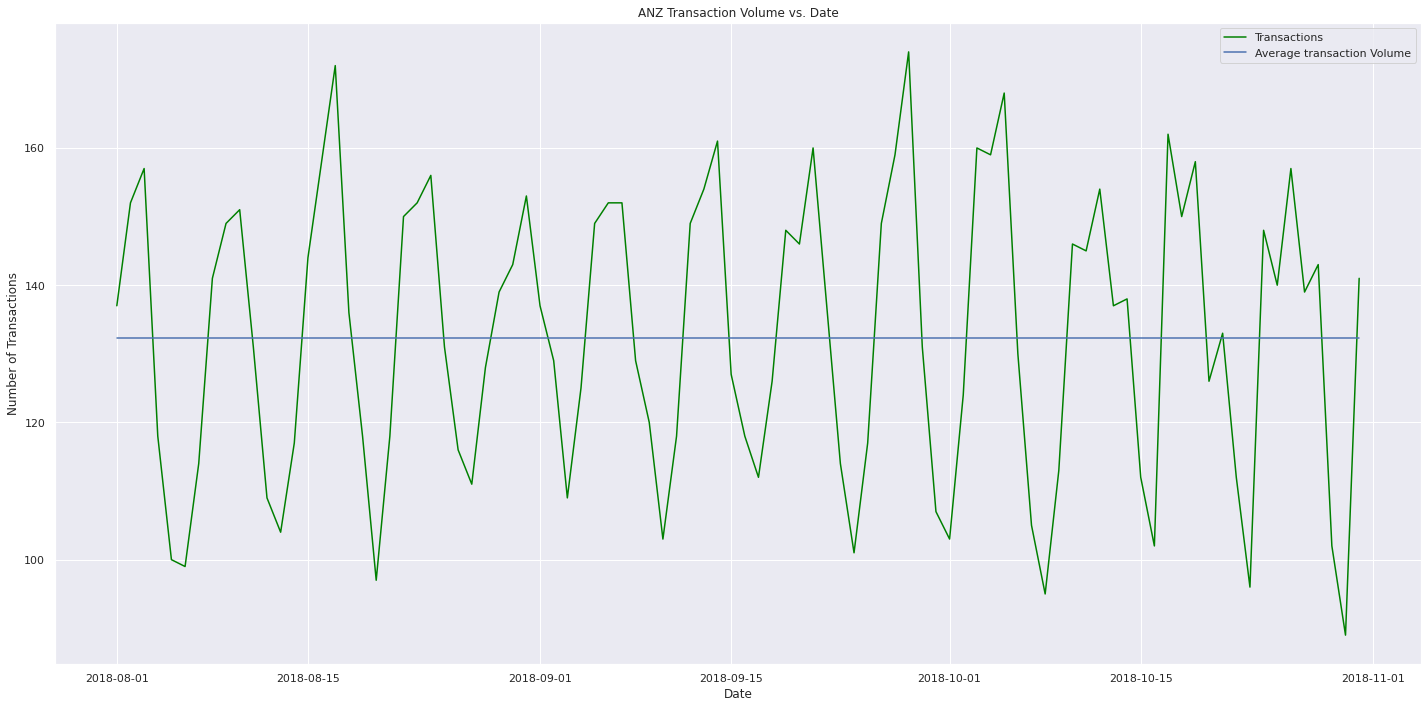

In [22]:
plt.figure(figsize=(20,10))
plt.plot(datecount.index, datecount['Count'], c="green", label = "Transactions")
plt.plot(datecount.index, np.linspace(transactionvol,transactionvol,n), c="b", label = "Average transaction Volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab(df['card_present_flag'],df['age'])

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,37,38,39,40,41,42,43,44,46,47,50,52,53,64,69,78
card_present_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,50,81,102,87,44,29,99,61,141,66,46,15,72,40,16,82,47,43,117,29,78,11,24,56,24,10,8,8,11,9,6,11,0
1.0,210,338,428,384,181,111,459,307,560,250,196,52,292,118,80,269,191,164,437,116,352,61,76,220,64,42,44,23,32,39,53,42,3


In [24]:
pd.crosstab(df['card_present_flag'],df['gender'])

gender,F,M
card_present_flag,,
0.0,760,763
1.0,3102,3092


In [25]:
pd.crosstab(df['card_present_flag'],df['merchant_state'])

merchant_state,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
card_present_flag,,,,,,,,
0.0,9,457,38,290,84,8,412,225
1.0,64,1712,167,1266,331,60,1719,875


Task 2

In [26]:
df.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat,Count
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99,1
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87,1
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87,1
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68,1
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06,1


In [27]:
salary = df[df['txn_description']=='PAY/SALARY']

In [28]:
pos = df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')]

In [29]:
diana =salary[salary['first_name']=='Diana']
diana[['amount','age','customer_id','first_name','date','balance']].head()

,amount,age,customer_id,first_name,date,balance
72,1013.67,26,CUS-2487424745,Diana,2018-08-01,1017.52
951,1013.67,26,CUS-2487424745,Diana,2018-08-08,1343.65
1849,1013.67,26,CUS-2487424745,Diana,2018-08-15,1440.22
2642,1013.67,26,CUS-2487424745,Diana,2018-08-22,1932.06
3575,1013.67,26,CUS-2487424745,Diana,2018-08-29,2273.97


In [30]:
#cust = pd.DataFrame()

In [31]:
def groupby(data, columns):
    return data.groupby(columns).size().to_frame('count').reset_index()

In [32]:
cust = groupby(salary,'customer_id')

In [33]:
cust.head()

,customer_id,count
0,CUS-1005756958,13
1,CUS-1117979751,7
2,CUS-1140341822,6
3,CUS-1147642491,13
4,CUS-1196156254,7


In [34]:
total_salary = []
for i in cust['customer_id']:
  x = salary[salary['customer_id']==i]
  total_salary.append(x[['amount','age','customer_id','first_name','date','balance']]['amount'].values.sum())
total_salary=np.array(total_salary)

In [35]:
total_salary

array([12616.11, 25050.55, 11499.06, 22248.07, 27326.11, 15976.52,
        7155.96, 16214.1 , 14804.27, 14165.76, 26500.46, 14603.68,
        9856.56, 27327.65, 21897.06, 14822.7 , 15000.  , 17128.44,
       11597.17, 23301.39, 19536.86,  9389.04, 15384.74,  7488.  ,
       15929.29,  9727.24, 21497.98, 35343.92,  9897.29, 17324.04,
       13852.02, 17397.59, 29644.68, 20282.6 , 17319.12, 12107.8 ,
       13027.69, 31762.12, 12214.46,  9246.72, 13312.38, 18478.32,
       12609.06, 13079.76, 25517.55,  9844.98, 14191.38, 22770.72,
       25305.41,  9782.16, 30837.1 , 11048.52, 11218.35, 24328.62,
       13921.8 , 11926.85, 33081.88, 22618.82, 10058.86, 19881.05,
       16311.06, 12951.12, 33644.13, 12304.74, 22061.64, 18150.99,
       11001.  , 24452.35, 16146.41,  8637.59, 13767.04, 11058.84,
       14296.1 , 28925.61, 13777.92, 10546.86, 11573.82, 19170.06,
        9226.08, 16542.11, 10089.48, 16127.1 , 17770.76, 14952.56,
       24623.27, 11137.68, 12877.15, 18531.66,  9821.8 , 12775

In [36]:
cust['Total Salary'] = total_salary

In [37]:
cust.head()

,customer_id,count,Total Salary
0,CUS-1005756958,13,12616.11
1,CUS-1117979751,7,25050.55
2,CUS-1140341822,6,11499.06
3,CUS-1147642491,13,22248.07
4,CUS-1196156254,7,27326.11


In [38]:
total_balance = []
for i in cust['customer_id']:
  x = salary[salary['customer_id']==i]
  total_balance.append(x[['amount','age','customer_id','first_name','date','balance']]['balance'].values.sum())
total_balance=np.array(total_balance)
cust['Total Balance'] = total_balance
cust.head()

,customer_id,count,Total Salary,Total Balance
0,CUS-1005756958,13,12616.11,61342.65
1,CUS-1117979751,7,25050.55,83700.42
2,CUS-1140341822,6,11499.06,35050.32
3,CUS-1147642491,13,22248.07,114575.08
4,CUS-1196156254,7,27326.11,166920.02


In [39]:
total_spending =[]
for i in cust['customer_id'].values:
  spending = pos[pos['customer_id']==i]
  total_spending.append(spending['amount'].values.sum())
total_spending = np.array(total_spending)
cust['Total Spending'] = total_spending
cust.head()

,customer_id,count,Total Salary,Total Balance,Total Spending
0,CUS-1005756958,13,12616.11,61342.65,1810.86
1,CUS-1117979751,7,25050.55,83700.42,3975.82
2,CUS-1140341822,6,11499.06,35050.32,4389.54
3,CUS-1147642491,13,22248.07,114575.08,3885.75
4,CUS-1196156254,7,27326.11,166920.02,4940.61


In [40]:
data = pd.merge(df,cust, on = 'customer_id', how = 'left')

In [41]:
data.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat,Count,count,Total Salary,Total Balance,Total Spending
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99,1,14,14191.38,29963.79,9819.21
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87,1,14,14191.38,29963.79,9819.21
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87,1,13,13027.69,22826.60,9685.76
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68,1,13,11597.17,51472.20,6845.27
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06,1,14,14191.38,29963.79,9819.21


In [42]:
data.to_excel('ANZ_Task1.xlsx')
!cp ANZ_Task1.xlsx "drive/My Drive/"

In [43]:
data.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat,Count,count,Total Salary,Total Balance,Total Spending
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99,1,14,14191.38,29963.79,9819.21
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87,1,14,14191.38,29963.79,9819.21
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87,1,13,13027.69,22826.60,9685.76
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68,1,13,11597.17,51472.20,6845.27
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06,1,14,14191.38,29963.79,9819.21


In [44]:
data = data[['status', 'account', 'currency', 'long_lat', 'txn_description',
       'first_name', 'balance', 'date', 'gender', 'age', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id', 'movement',
       'card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state',
       'merchant_long_lat', 'Count', 'count', 'Total Salary', 'Total Balance',
       'Total Spending']]

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,70))
x = scaler.fit_transform(data['Total Salary'].values.reshape(-1,1))

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,70))
y = scaler.fit_transform(data['age'].values.reshape(-1,1))

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Mean Absolute Error: 9.56
Mean Squared Error: 138.42
Root Mean Squared Error: 11.77


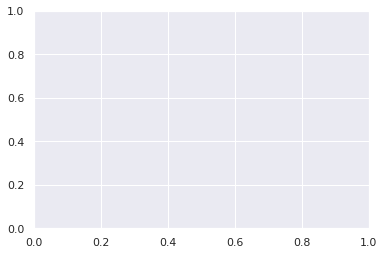

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

In [49]:
data.corr()

,balance,age,amount,card_present_flag,Count,count,Total Salary,Total Balance,Total Spending
balance,1.000000,0.199329,0.059178,0.005925,NaN,-0.191837,0.253089,0.966485,-0.176509
age,0.199329,1.000000,0.029980,-0.008405,NaN,0.126851,0.026425,0.227929,-0.069254
amount,0.059178,0.029980,1.000000,-0.002074,NaN,-0.024975,0.091213,0.055703,-0.093827
card_present_flag,0.005925,-0.008405,-0.002074,1.000000,NaN,-0.004679,-0.018868,0.004907,0.002813
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,-0.191837,0.126851,-0.024975,-0.004679,NaN,1.000000,-0.041269,-0.057328,0.275688
Total Salary,0.253089,0.026425,0.091213,-0.018868,NaN,-0.041269,1.000000,0.302049,-0.149849
Total Balance,0.966485,0.227929,0.055703,0.004907,NaN,-0.057328,0.302049,1.000000,-0.206418
Total Spending,-0.176509,-0.069254,-0.093827,0.002813,NaN,0.275688,-0.149849,-0.206418,1.000000


Mean Absolute Error: 9.56
Mean Squared Error: 137.55
Root Mean Squared Error: 11.73


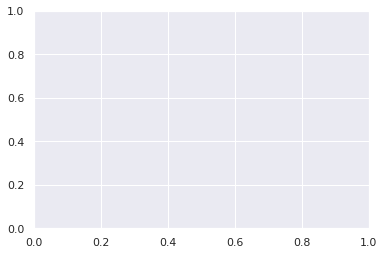

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,70))
x = scaler.fit_transform(data['Total Spending'].values.reshape(-1,1))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,70))
y = scaler.fit_transform(data['age'].values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

Mean Absolute Error: 12.67
Mean Squared Error: 248.38
Root Mean Squared Error: 15.76


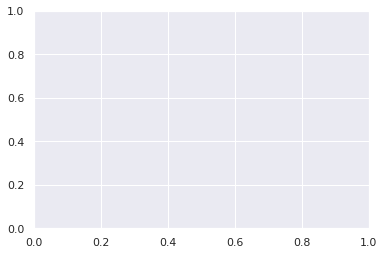

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,70))
x = scaler.fit_transform(data['Total Spending'].values.reshape(-1,1))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,70))
y = scaler.fit_transform(data['Total Salary'].values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

In [52]:
data.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat,Count,count,Total Salary,Total Balance,Total Spending
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99,1,14,14191.38,29963.79,9819.21
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87,1,14,14191.38,29963.79,9819.21
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87,1,13,13027.69,22826.60,9685.76
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68,1,13,11597.17,51472.20,6845.27
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06,1,14,14191.38,29963.79,9819.21


In [53]:
dict = {'M':1,'F':0}
data['gender'] = data['gender'].map(dict)

In [54]:
data.columns

Index(['status', 'account', 'currency', 'long_lat', 'txn_description',
       'first_name', 'balance', 'date', 'gender', 'age', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id', 'movement',
       'card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state',
       'merchant_long_lat', 'Count', 'count', 'Total Salary', 'Total Balance',
       'Total Spending'],
      dtype='object')

In [55]:
d = data[[ 'txn_description',
        'balance', 'gender', 'age', 'amount', 'transaction_id', 'country', 'customer_id', 'movement',
       'card_present_flag', 'merchant_suburb', 'merchant_state', 'Count', 'count', 'Total Salary', 'Total Balance',
       'Total Spending']]

In [56]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   txn_description    12043 non-null  object 
 1   balance            12043 non-null  float64
 2   gender             12043 non-null  int64  
 3   age                12043 non-null  int64  
 4   amount             12043 non-null  float64
 5   transaction_id     12043 non-null  object 
 6   country            12043 non-null  object 
 7   customer_id        12043 non-null  object 
 8   movement           12043 non-null  object 
 9   card_present_flag  7717 non-null   float64
 10  merchant_suburb    7717 non-null   object 
 11  merchant_state     7717 non-null   object 
 12  Count              12043 non-null  int64  
 13  count              12043 non-null  int64  
 14  Total Salary       12043 non-null  float64
 15  Total Balance      12043 non-null  float64
 16  Total Spending     120

In [57]:
for column in d.columns:
    d[column].fillna(d[column].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [58]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   txn_description    12043 non-null  object 
 1   balance            12043 non-null  float64
 2   gender             12043 non-null  int64  
 3   age                12043 non-null  int64  
 4   amount             12043 non-null  float64
 5   transaction_id     12043 non-null  object 
 6   country            12043 non-null  object 
 7   customer_id        12043 non-null  object 
 8   movement           12043 non-null  object 
 9   card_present_flag  12043 non-null  float64
 10  merchant_suburb    12043 non-null  object 
 11  merchant_state     12043 non-null  object 
 12  Count              12043 non-null  int64  
 13  count              12043 non-null  int64  
 14  Total Salary       12043 non-null  float64
 15  Total Balance      12043 non-null  float64
 16  Total Spending     120

In [59]:
d.card_present_flag = d.card_present_flag.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
d.head()

,txn_description,balance,gender,age,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_suburb,merchant_state,Count,count,Total Salary,Total Balance,Total Spending
0,POS,35.39,0,26,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1,Ashmore,QLD,1,14,14191.38,29963.79,9819.21
1,SALES-POS,21.20,0,26,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0,Sydney,NSW,1,14,14191.38,29963.79,9819.21
2,POS,5.71,1,38,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1,Sydney,NSW,1,13,13027.69,22826.60,9685.76
3,SALES-POS,2117.22,0,40,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1,Buderim,QLD,1,13,11597.17,51472.20,6845.27
4,SALES-POS,17.95,0,26,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1,Mermaid Beach,QLD,1,14,14191.38,29963.79,9819.21


In [61]:
d.drop(['transaction_id','country','customer_id','merchant_suburb'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
d.head()

,txn_description,balance,gender,age,amount,movement,card_present_flag,merchant_state,Count,count,Total Salary,Total Balance,Total Spending
0,POS,35.39,0,26,16.25,debit,1,QLD,1,14,14191.38,29963.79,9819.21
1,SALES-POS,21.20,0,26,14.19,debit,0,NSW,1,14,14191.38,29963.79,9819.21
2,POS,5.71,1,38,6.42,debit,1,NSW,1,13,13027.69,22826.60,9685.76
3,SALES-POS,2117.22,0,40,40.90,debit,1,QLD,1,13,11597.17,51472.20,6845.27
4,SALES-POS,17.95,0,26,3.25,debit,1,QLD,1,14,14191.38,29963.79,9819.21


In [63]:
anz = cust[['Total Salary','Total Balance','Total Spending']]

In [64]:
def formula(d):
  if d['Total Spending'] > d['Total Salary'] and d['Total Balance'] < d['Total Spending']:
    return "bad"
  elif d['Total Spending']<d['Total Salary'] and d['Total Spending']>d['Total Balance']:
    return "good"
  elif d['Total Spending']>d['Total Salary'] and d['Total Spending']<d['Total Balance']:
    return "good" 
  elif d['Total Spending']<d['Total Salary'] and d['Total Spending'] < d['Total Balance']:
    return "best"
  else:
    return "bad"
anz['Status'] = anz.apply(formula,axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [65]:
anz.Status.value_counts()

best    100
Name: Status, dtype: int64

In [66]:
anz.head()

,Total Salary,Total Balance,Total Spending,Status
0,12616.11,61342.65,1810.86,best
1,25050.55,83700.42,3975.82,best
2,11499.06,35050.32,4389.54,best
3,22248.07,114575.08,3885.75,best
4,27326.11,166920.02,4940.61,best


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,100))
anz['Annual Salary'] = scaler.fit_transform(anz['Total Salary'].values.reshape(-1,1))

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,100))
anz['Annual Balance'] = scaler.fit_transform(anz['Total Balance'].values.reshape(-1,1))

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,100))
anz['Annual Spending'] = scaler.fit_transform(anz['Total Spending'].values.reshape(-1,1))

In [70]:
anz.head()

,Total Salary,Total Balance,Total Spending,Status,Annual Salary,Annual Balance,Annual Spending
0,12616.11,61342.65,1810.86,best,19.370504,3.028202,18.020394
1,25050.55,83700.42,3975.82,best,63.483097,4.451359,40.182583
2,11499.06,35050.32,4389.54,best,15.407642,1.354596,44.417738
3,22248.07,114575.08,3885.75,best,53.540980,6.416648,39.260557
4,27326.11,166920.02,4940.61,best,71.555905,9.748601,50.058913


In [71]:
def calculate_annual_salary_percentile(annual_salary, annual_salary_list):
    annual_salary_percentiles=np.percentile(annual_salary_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_salary_percentiles):
        if annual_salary>val:
            percentile=i
    annual_salary_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile
  

In [72]:

anz['Salary Percentile']= anz['Annual Salary'].apply(calculate_annual_salary_percentile, args=(anz['Annual Salary'],))

In [73]:
anz['Balance Percentile'] = anz['Annual Balance'].apply(calculate_annual_salary_percentile, args=(anz['Annual Balance'],))
anz['Spending Percentile'] = anz['Annual Spending'].apply(calculate_annual_salary_percentile, args=(anz['Annual Spending'],))

In [74]:
anz = anz[['Total Salary', 'Total Balance', 'Total Spending', 'Status',
       'Annual Salary', 'Annual Balance', 'Annual Spending',
       'Salary Percentile', 'Balance Percentile',
       'Spending Percentile']]

In [75]:
def formula(d):
  if d['Spending Percentile'] > d['Salary Percentile'] and d['Balance Percentile'] < d['Spending Percentile']:
    return "bad"
  elif d['Spending Percentile']<d['Salary Percentile'] and d['Spending Percentile']>d['Balance Percentile']:
    return "good"
  elif d['Spending Percentile']>d['Salary Percentile'] and d['Spending Percentile']<d['Balance Percentile']:
    return "good" 
  elif d['Spending Percentile']<d['Salary Percentile'] and d['Spending Percentile'] < d['Balance Percentile']:
    return "best"
  else:
    return "bad"
anz['Status'] = anz.apply(formula,axis = 1)

In [76]:
anz.Status.value_counts()

bad     54
best    32
good    14
Name: Status, dtype: int64

In [77]:
anz.head()

,Total Salary,Total Balance,Total Spending,Status,Annual Salary,Annual Balance,Annual Spending,Salary Percentile,Balance Percentile,Spending Percentile
0,12616.11,61342.65,1810.86,best,19.370504,3.028202,18.020394,30,40,20
1,25050.55,83700.42,3975.82,good,63.483097,4.451359,40.182583,80,50,70
2,11499.06,35050.32,4389.54,bad,15.407642,1.354596,44.417738,20,10,80
3,22248.07,114575.08,3885.75,bad,53.540980,6.416648,39.260557,70,70,70
4,27326.11,166920.02,4940.61,bad,71.555905,9.748601,50.058913,80,80,80


In [78]:
anz.shape

(100, 10)

In [79]:
d.head()

,txn_description,balance,gender,age,amount,movement,card_present_flag,merchant_state,Count,count,Total Salary,Total Balance,Total Spending
0,POS,35.39,0,26,16.25,debit,1,QLD,1,14,14191.38,29963.79,9819.21
1,SALES-POS,21.20,0,26,14.19,debit,0,NSW,1,14,14191.38,29963.79,9819.21
2,POS,5.71,1,38,6.42,debit,1,NSW,1,13,13027.69,22826.60,9685.76
3,SALES-POS,2117.22,0,40,40.90,debit,1,QLD,1,13,11597.17,51472.20,6845.27
4,SALES-POS,17.95,0,26,3.25,debit,1,QLD,1,14,14191.38,29963.79,9819.21


In [80]:
anz.head()

,Total Salary,Total Balance,Total Spending,Status,Annual Salary,Annual Balance,Annual Spending,Salary Percentile,Balance Percentile,Spending Percentile
0,12616.11,61342.65,1810.86,best,19.370504,3.028202,18.020394,30,40,20
1,25050.55,83700.42,3975.82,good,63.483097,4.451359,40.182583,80,50,70
2,11499.06,35050.32,4389.54,bad,15.407642,1.354596,44.417738,20,10,80
3,22248.07,114575.08,3885.75,bad,53.540980,6.416648,39.260557,70,70,70
4,27326.11,166920.02,4940.61,bad,71.555905,9.748601,50.058913,80,80,80


In [81]:
cust.head()

,customer_id,count,Total Salary,Total Balance,Total Spending
0,CUS-1005756958,13,12616.11,61342.65,1810.86
1,CUS-1117979751,7,25050.55,83700.42,3975.82
2,CUS-1140341822,6,11499.06,35050.32,4389.54
3,CUS-1147642491,13,22248.07,114575.08,3885.75
4,CUS-1196156254,7,27326.11,166920.02,4940.61


In [82]:
data.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement,card_present_flag,merchant_id,merchant_suburb,merchant_state,merchant_long_lat,Count,count,Total Salary,Total Balance,Total Spending
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,0,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,1.0,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,QLD,153.38 -27.99,1,14,14191.38,29963.79,9819.21
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,0,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,0.0,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,NSW,151.21 -33.87,1,14,14191.38,29963.79,9819.21
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,1,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,1.0,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,NSW,151.21 -33.87,1,13,13027.69,22826.60,9685.76
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,0,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,1.0,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,QLD,153.05 -26.68,1,13,11597.17,51472.20,6845.27
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,0,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,1.0,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,QLD,153.44 -28.06,1,14,14191.38,29963.79,9819.21


In [83]:
anz['id'] = cust['customer_id']

In [84]:
anz.rename({'id':'customer_id'}, axis = 1, inplace = True)

In [85]:
#new = pd.merge(anz,data, on = 'customer_id',how = 'right')

In [86]:
anz.shape

(100, 11)

In [87]:
anz.Status.value_counts()

bad     54
best    32
good    14
Name: Status, dtype: int64

In [88]:
dict = {'bad': 1, 'good': 2, 'best': 3}
anz.Status = anz.Status.map(dict)

In [90]:
anz = anz[['Total Salary', 'Total Balance', 'Total Spending', 
       'Annual Salary', 'Annual Balance', 'Annual Spending',
       'Salary Percentile', 'Balance Percentile', 'Spending Percentile','Status']]

In [91]:
anz.iloc[:,:-1]

,Total Salary,Total Balance,Total Spending,Annual Salary,Annual Balance,Annual Spending,Salary Percentile,Balance Percentile,Spending Percentile
0,12616.11,61342.65,1810.86,19.370504,3.028202,18.020394,30,40,20
1,25050.55,83700.42,3975.82,63.483097,4.451359,40.182583,80,50,70
2,11499.06,35050.32,4389.54,15.407642,1.354596,44.417738,20,10,80
3,22248.07,114575.08,3885.75,53.540980,6.416648,39.260557,70,70,70
4,27326.11,166920.02,4940.61,71.555905,9.748601,50.058913,80,80,80
...,...,...,...,...,...,...,...,...,...
95,8703.84,54704.11,1554.53,5.491281,2.605634,15.396403,10,30,20
96,13481.91,72529.42,2402.18,22.442028,3.740283,24.073598,40,50,40
97,10851.72,25328.81,5983.16,13.111130,0.735785,60.731253,10,10,80
98,8603.88,58334.28,1618.57,5.136661,2.836708,16.051966,10,30,20


In [97]:
scaler = MinMaxScaler()
d = pd.DataFrame(scaler.fit_transform(anz.iloc[:,:-1].values), columns=anz.iloc[:,:-1].columns, index=anz.index)

In [99]:
d.Status = anz.Status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [102]:
y = anz.Status
X = d

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [112]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [113]:
pred = regr.predict(X_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[10  0  0]
 [ 5  0  0]
 [ 1  0  4]]
              precision    recall  f1-score   support

           1       0.62      1.00      0.77        10
           2       0.00      0.00      0.00         5
           3       1.00      0.80      0.89         5

    accuracy                           0.70        20
   macro avg       0.54      0.60      0.55        20
weighted avg       0.56      0.70      0.61        20

0.7


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
